# Bilateral Filtering

---


A bilateral filter is a non-linear, edge-preserving, and noise-reducing smoothing filter for images. It replaces the intensity of each pixel with a weighted average of intensity values from nearby pixels. This weight can be based on a Gaussian distribution. Crucially, the weights depend not only on Euclidean distance of pixels, but also on the radiometric differences (e.g., range differences, such as color intensity, depth distance, etc.). This preserves sharp edges.

## Definition

A bilateral filter is defined as follows:
$$
\begin{align}
\mathcal{I}_{filtered}(\mathbf{x}) &= \frac{1}{\mathcal{W}_p} \sum_{\mathbf{x}_{\mathbf{i}} \in \mathcal{\Omega}} \mathcal{I}(\mathbf{x}_\mathbf{i}) \mathbf{f}_\mathbf{r}(||\mathcal{I}(\mathbf{x}_\mathbf{i}) - \mathcal{I}(\mathbf{x})||) \mathbf{g}_\mathbf{s}(||\mathbf{x}_\mathbf{i} - \mathbf{x}||) \\
\end{align}
$$

and the normalization factor $\mathcal{W}_p$ is defined as:

$$
\begin{align}
\mathcal{W}_p &= \sum_{x_i \in \mathcal{\Omega}} f_r(||\mathcal{I}(x_i) - \mathcal{I}(x)||) g_s(||x_i - x||) \\
\end{align}
$$

where
- $\mathcal{I}_{filtered}$ is the filtered image,
- $\mathcal{I}$ is the original image,
- $x_i$ is the pixel location of the $i$-th pixel in the neighborhood,
- $x$ is the pixel location of the current pixel,
- $\mathcal{\Omega}$ is the window centered at $x$,
- $f_r$ is the radiometric weight function,
- $g_s$ is the spatial weight function, and
- $\mathcal{W}_p$ is the normalization factor.



## Example

Consider a pixel located at $(i,j)$ that needs to be denoised in image using its neighbouring pixels and one of its neighbouring pixels is located at $(k,l)$. Then, assuming the range and spatial kernels to be Gaussian kernels, the weight assigned for pixel $(k,l)$ to denoise the pixel $(i,j)$ is given by


$$
\begin{align}
w(i, j, k, l) &= \exp\left(-\frac{(i - k)^2 + (j - l)^2}{2\sigma_d^2}-\frac{||I(i,j) - I(i,j)||^2}{2\sigma_r^2} \right)
\end{align}
$$
where $\sigma_d$ and $\sigma_r$ are smoothing parameters, and $I(i, j)$ and $I(k, l)$ are the intensity of pixels $(i,j)$ and $(k,l)$ respectively.


After calculating the weights, normalize them:

$$
\begin{align}
\mathcal{I}_D(i, j) &= \frac{\sum_{k, l} I(k, l) w(i, j, k, l)}{\sum_{k, l} w(i, j, k, l)} \\
\end{align}
$$
where $I_D$ is the denoised intensity of pixel $(i,j)$.

In [1]:
import cv2
import matplotlib.pyplot as plt

import bilateral_filter as bf

### Reading an input image

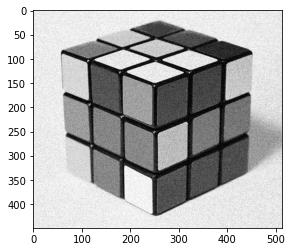

Image shape:  (449, 513)


In [2]:
img: cv2.Mat = cv2.imread('./images/rubiks_cube.png', 0)
plt.imshow(img, cmap='gray')                                # type: ignore
plt.show()

print('Image shape: ', img.shape)

### Defining filter size and $\sigma_d$, $\sigma_r$ values

In [3]:
filter_size = 15
spread = (filter_size - 1) // 2
sigma_d = 5
sigma_r = 5

### Applying the bilateral filter to the image

In [4]:
bi_filter = bf.BilateralFilter(filter_size, sigma_d, sigma_r)
output_img = bi_filter.apply(img)

### Displaying the filtered image

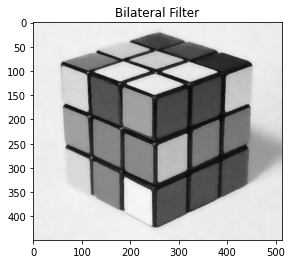

In [5]:
plt.imshow(output_img, cmap='gray')                         # type: ignore
plt.title('Bilateral Filter')
plt.show()

### Applying `cv2.bilateralFilter()` to the image

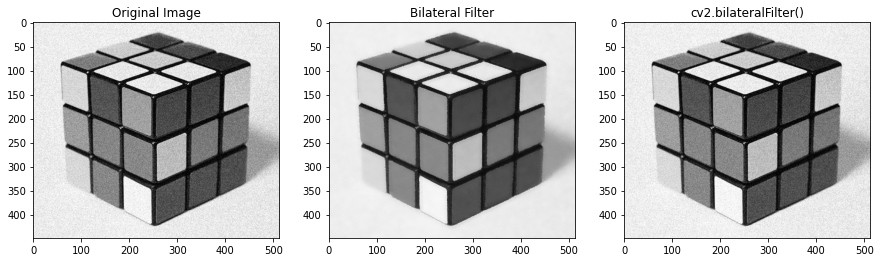

In [6]:
blurred_img = cv2.bilateralFilter(img, filter_size, sigma_r, sigma_d)   # type: ignore

figure, axis = plt.subplots(1, 3, figsize=(15, 15))
axis[0].imshow(img, cmap='gray')                                        # type: ignore
axis[0].set_title('Original Image')                                     # type: ignore
axis[1].imshow(output_img, cmap='gray')                                 # type: ignore
axis[1].set_title('Bilateral Filter')                                   # type: ignore
axis[2].imshow(blurred_img, cmap='gray')                                # type: ignore
axis[2].set_title('cv2.bilateralFilter()')                              # type: ignore
plt.show()

In [7]:
print("Maximum Intensity of the Input/Original Image: ", img.max())             # type: ignore
print("Minimum Intensity of the Input/Original Image: ", img.min())             # type: ignore
print("Type of the Input/Original image: ", img.dtype)

print("Maximum Intensity of the Output/Filtered Image: ", output_img.max())     # type: ignore
print("Minimum Intensity of the Output/Filtered Image: ", output_img.min())     # type: ignore
print("Type of the Output/Filtered image: ", output_img.dtype)

Maximum Intensity of the Input/Original Image:  255
Minimum Intensity of the Input/Original Image:  0
Type of the Input/Original image:  uint8
Maximum Intensity of the Output/Filtered Image:  252
Minimum Intensity of the Output/Filtered Image:  0
Type of the Output/Filtered image:  uint8
